In [8]:
# 🧰 Libraries Used in the Project

# 📦 Data Manipulation & Analysis
import pandas as pd
import numpy as np

# 📉 Missing Value Visualization
import missingno as msno

# 📊 Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ⚙️ Data Preprocessing & Encoding
from fuzzywuzzy import fuzz
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

# 🤖 Machine Learning Models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# 📈 Model Evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [9]:
df = pd.read_csv(r"D:\my_projcts\git_hub_repositry\real-estate-price-prediction\data\Egypt_Houses_Price.csv")

# 1- inspection of Data

In [10]:
print(df.shape) # 27361 rows and 12 columns 
display(df.columns.to_list())

(27361, 12)


['Type',
 'Price',
 'Bedrooms',
 'Bathrooms',
 'Area',
 'Furnished',
 'Level',
 'Compound',
 'Payment_Option',
 'Delivery_Date',
 'Delivery_Term',
 'City']

In [11]:
display(df.head())
display(df.tail())

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
27356,Town House,890000,3.0,2.0,240.0,Unknown,Unknown,Unknown,Unknown Payment,Unknown,Unknown,North Coast
27357,Town House,4000000,4.0,3.0,218.0,Unknown,Unknown,Unknown,Cash or Installment,Unknown,Finished,New Cairo - El Tagamoa
27358,Twin House,13800000,3.0,4.0,308.0,No,Unknown,Cairo Festival City,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa
27359,Stand Alone Villa,35000000,4.0,4.0,478.0,Unknown,Unknown,Unknown,Unknown Payment,Unknown,Finished,Mokattam
27360,Stand Alone Villa,4800000,5.0,5.0,NaN,No,Unknown,Unknown,Cash,Unknown,Finished,Sheikh Zayed


In [12]:
print(df.info())
display(df.describe(include='all').T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            27361 non-null  object
 1   Price           27359 non-null  object
 2   Bedrooms        27158 non-null  object
 3   Bathrooms       27190 non-null  object
 4   Area            26890 non-null  object
 5   Furnished       27361 non-null  object
 6   Level           27361 non-null  object
 7   Compound        27361 non-null  object
 8   Payment_Option  27361 non-null  object
 9   Delivery_Date   27361 non-null  object
 10  Delivery_Term   27361 non-null  object
 11  City            27361 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB
None


,count,unique,top,freq
Type,27361,11,Apartment,8506
Price,27359,4182,3000000,311
Bedrooms,27158,22,3,9784
Bathrooms,27190,22,2,7753
Area,26890,1073,120.0,663
Furnished,27361,3,No,16500
Level,27361,14,Unknown,10439
Compound,27361,560,Unknown,11068
Payment_Option,27361,4,Cash or Installment,10842
Delivery_Date,27361,10,Ready to move,12142


In [13]:
memory_before = (df.memory_usage(deep=True).sum() / 1024 ** 2) # with MB


**1- Convert columns Type**

In [14]:
# slect only columns with (numeric values)
numeric_cols = ['Price' , "Bedrooms" , "Bathrooms" , "Area"]
for col in numeric_cols :
    df[col] = pd.to_numeric(df[col] , errors="coerce")


# Select only columns with object type (text)
cat_cols = df.select_dtypes(include='object').columns.tolist()

for col in cat_cols:
    df[col] = df[col].astype('category')


**2- Verify conversion**

In [15]:
print("\n🟢 Updated data types:")
print(df.dtypes)


🟢 Updated data types:
Type              category
Price              float64
Bedrooms           float64
Bathrooms          float64
Area               float64
Furnished         category
Level             category
Compound          category
Payment_Option    category
Delivery_Date     category
Delivery_Term     category
City              category
dtype: object


**3- memory improvement**

In [16]:
memory_used = df.memory_usage(deep="True").sum() / 1024**2


print(f"\n💾 Total memory usage before categorical conversion: {memory_before:.2f} MB")
print(f"\n💾 Total memory usage after categorical conversion: {memory_used:.2f} MB")



💾 Total memory usage before categorical conversion: 17.59 MB

💾 Total memory usage after categorical conversion: 1.16 MB


## 🧩 Step 1 — Data Understanding & Type Optimization

### 🎯 Objective
The goal of this step was to explore the dataset, understand its structure, 
and optimize data types to reduce memory usage and prepare it for cleaning and modeling.

---

### 📊 1. Dataset Overview
- **Shape:** (27,361 rows × 12 columns)
- **Initial Memory Usage:** 17.59 MB

---

### 🧠 2. Type Conversion
**Numeric Columns Converted:**  
`Price`, `Bedrooms`, `Bathrooms`, `Area` → converted from `object` → `float64`  
`Level` → kept as `category` (since it includes special values like *Ground*, *Highest*, *Unknown*)  

**Categorical Columns Converted:**  
`Type`, `Furnished`, `Compound`, `Payment_Option`, `Delivery_Date`, `Delivery_Term`, `City` → converted from `object` → `category`  

---

### ⚙️ 3. Memory Optimization
| Stage | Memory Usage (MB) |
|:------|------------------:|
| Before Optimization | 17.59 |
| After Optimization | 1.16 |

✅ **Memory Reduced by ~93.4%**
---

### 🧾 4. Results Summary
- All numeric columns are properly typed (`float64`).  
- Text columns with limited unique values are now `category`.  
- The dataset is lighter, faster to process, and ready for cleaning.



# 2- Data Cleaning

**1- Check missing values**

In [17]:
missing_counts = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean() * 100).round(2)

missing_summary = pd.DataFrame({
    'Missing Values': missing_counts,
    'Missing %': missing_percent
})

print("🧾 Missing Values per Column:")
display(missing_summary)


🧾 Missing Values per Column:


,Missing Values,Missing %
Area,507,1.85
Bathrooms,208,0.76
Bedrooms,240,0.88
City,0,0.00
Compound,0,0.00
Delivery_Date,0,0.00
Delivery_Term,0,0.00
Furnished,0,0.00
Level,0,0.00
Payment_Option,0,0.00


**2- Visualize Missing Values**

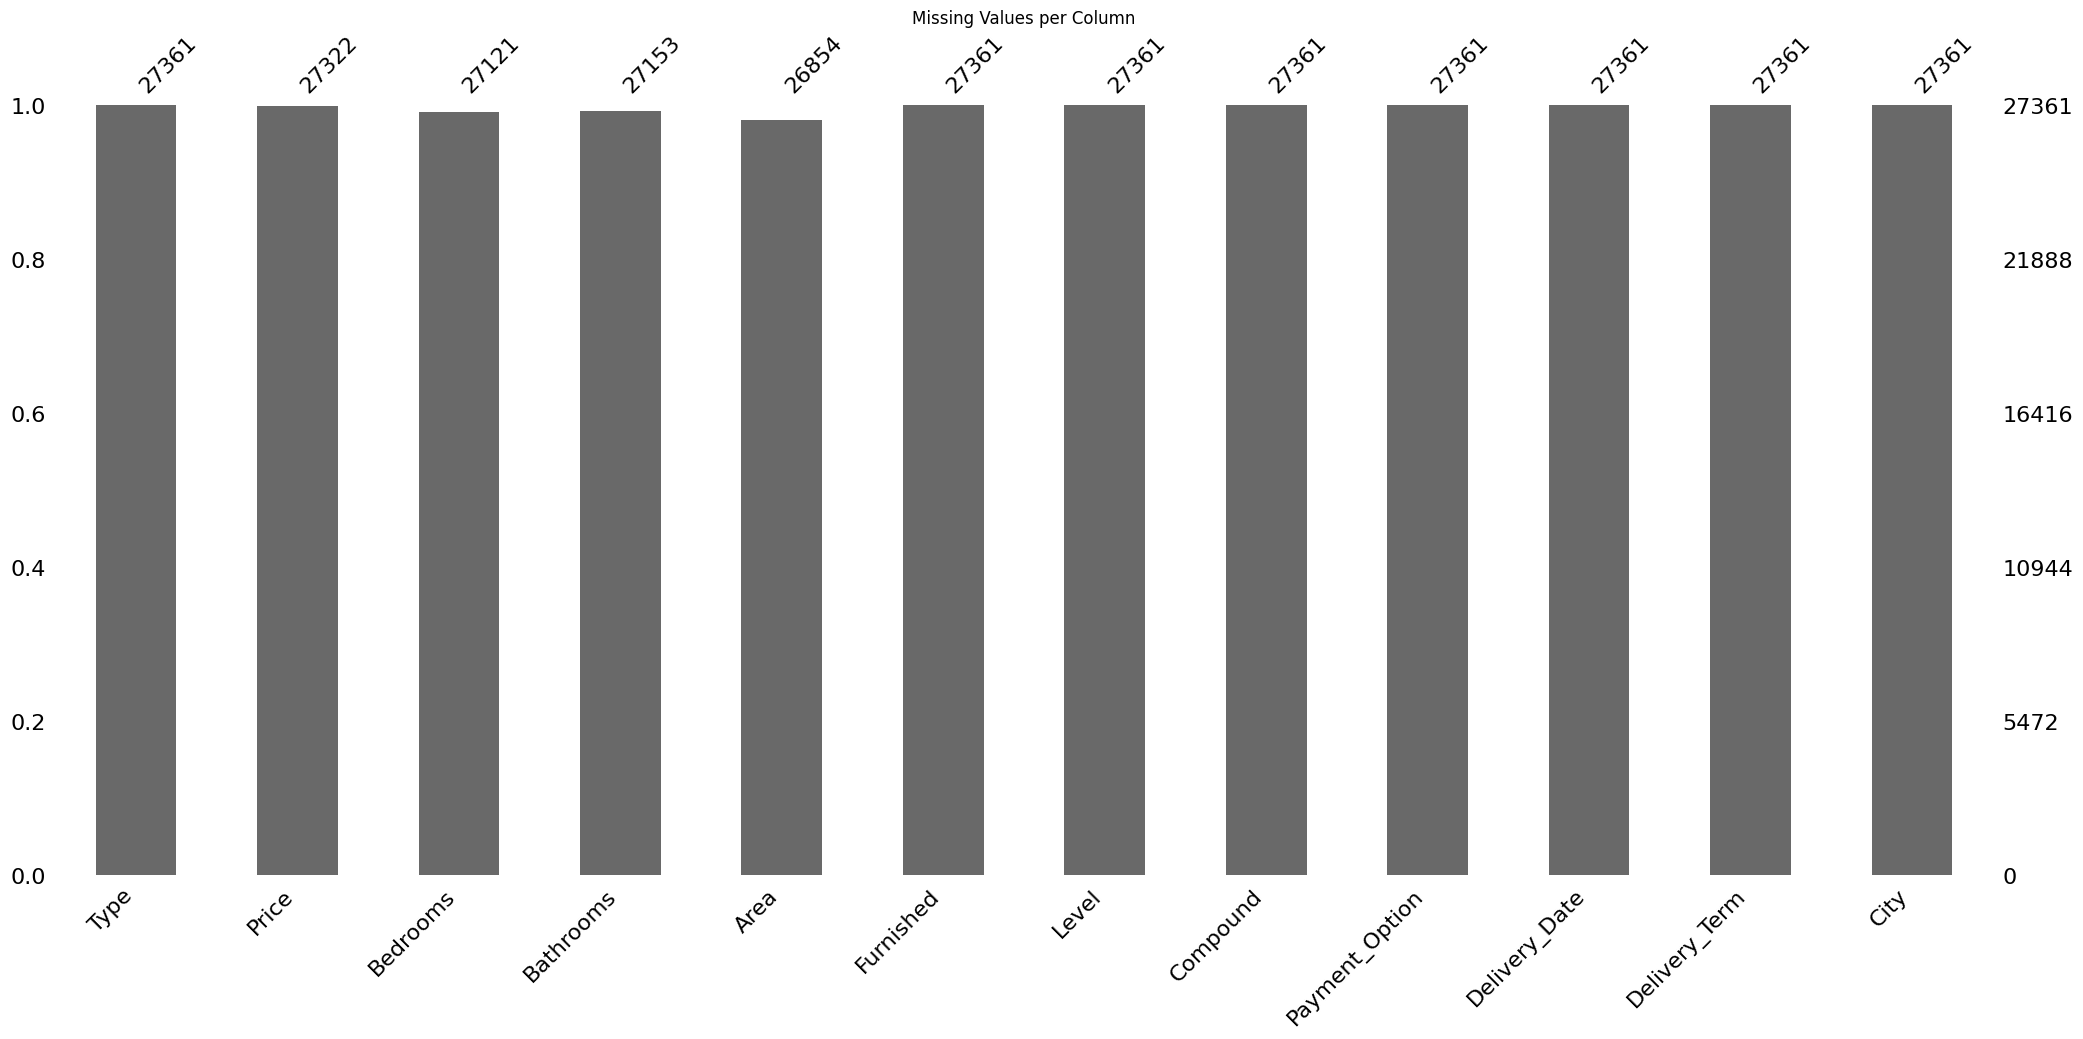

In [18]:
plt.figure(figsize=(10,6))
msno.bar(df)
plt.title("Missing Values per Column")
plt.show()


**3- Fill numeric missing values with median**

In [19]:
numeric_cols = ['Price', 'Area', 'Bedrooms', 'Bathrooms']

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Verify filling
print(df[numeric_cols].isnull().sum())


Price        0
Area         0
Bedrooms     0
Bathrooms    0
dtype: int64


**4- Handle duplicated rows**

In [20]:
df.duplicated().sum()

# Remove duplicates and reset index
df = df.drop_duplicates().reset_index(drop=True)

# Confirm removal
print(f"✅ Remaining rows after removing duplicates: {df.shape[0]}")


✅ Remaining rows after removing duplicates: 25434


**5- Cleaning Type column**

In [21]:
unique_types = sorted(df['Type'].dropna().unique())
print(f"🧾 Found {len(unique_types)} unique property types.")
unique_types


🧾 Found 11 unique property types.


['Apartment',
 'Chalet',
 'Duplex',
 'Penthouse',
 'Stand Alone Villa',
 'Standalone Villa',
 'Studio',
 'Town House',
 'Twin House',
 'Twin house',
 'Unknown']

In [22]:
similar_pairs = []

for i in range(len(unique_types)):
    for j in range(i + 1, len(unique_types)):
        score = fuzz.ratio(unique_types[i], unique_types[j]) # similarity score between 0 and 100
        if 85 < score < 100:  # 100 means identical, skip that
            similar_pairs.append((unique_types[i], unique_types[j], score))

# Show results
pd.DataFrame(similar_pairs, columns=["Value 1", "Value 2", "Similarity (%)"]).sort_values(by="Similarity (%)", ascending=False).head(20)


,Value 1,Value 2,Similarity (%)
0,Stand Alone Villa,Standalone Villa,91
1,Town House,Twin House,90
2,Twin House,Twin house,90


In [23]:
df['Type'] = df['Type'].str.lower().str.strip()

df['Type'] = df['Type'].replace({
    'stand alone villa': 'standalone villa',
    'stand alone villa': 'standalone villa',
    'twinhouse': 'twin house',
    'townhouse': 'town house'
})


In [24]:
print(sorted(df['Type'].dropna().unique()))


['apartment', 'chalet', 'duplex', 'penthouse', 'standalone villa', 'studio', 'town house', 'twin house', 'unknown']


**6- Normalize Furnished , Payment_Option , Delivery_Date , Delivery_Term , Compound**

In [25]:
cols = ["Furnished" ,"Payment_Option" , "Delivery_Date" , "Delivery_Term" , "Compound"]

for col in cols:
    df[col] = df[col].str.lower().str.strip()

for col in ['Payment_Option', 'Furnished']:
    print(f"\n{col} unique values:\n", df[col].unique())

print(f"\n{df['Compound'].nunique()} unique compounds after cleaning")




Payment_Option unique values:
 ['cash' 'cash or installment' 'unknown payment' 'installment']

Furnished unique values:
 ['no' 'unknown' 'yes']

560 unique compounds after cleaning


**7- Clean Delivery_Date column**

In [26]:
# Replace inconsistent 
df['Delivery_Date'] = df['Delivery_Date'].replace({
    'ready to move': 'ready_to_move',
    'soon': 'within_6_months',
    'within 6 months': 'within_6_months',  # unify format
})

print(df['Delivery_Date'].unique())


['ready_to_move' '2024' 'unknown' '2023' 'within_6_months' '2025' '2022'
 '2026' '2027']


**8- Clean Delivery_Term column**

In [27]:
# Replace inconsistent values
df['Delivery_Term'] = df['Delivery_Term'].replace({
    'semi finished': 'semi_finished',
    'core & shell': 'core_and_shell',
    'not finished': 'not_finished',
})

print(df['Delivery_Term'].unique())


['finished' 'semi_finished' 'core_and_shell' 'unknown' 'not_finished']


In [28]:
df = df.drop_duplicates()
cat_cols = ['Type', 'Furnished', 'Payment_Option', 'Delivery_Date', 'Delivery_Term', 'Compound']
df[cat_cols] = df[cat_cols].astype('category')


memory_after_cleaning = df.memory_usage(deep="True").sum() / 1024 **2
memory_after_cleaning

np.float64(1.2789087295532227)

## 🧹 Step 2: Data Cleaning Summary

### 🎯 Goal
Prepare and clean the dataset for analysis by:
- Removing duplicates  
- Handling missing values  
- Standardizing text formats  
- Optimizing categorical columns  

---

### 🧾 Actions Performed

1. **Removed duplicate rows**  
   - Ensured dataset contains only unique listings.  
   - ✅ Remaining rows: **25,433**

2. **Handled missing values**  
   - Columns affected: `["Furnished", "Payment_Option", "Delivery_Date", "Delivery_Term", "Compound"]`

3. **Normalized text columns**  
   - Converted to lowercase and removed extra spaces.  
   - Example: `" Ready to move "` → `"ready to move"`

4. **Standardized inconsistent category names**  
   - Fixed variations like:
     - `"stand alone villa"` → `"standalone villa"`
     - `"twinhouse"` → `"twin house"`
     - `"townhouse"` → `"town house"`

5. **Kept “unknown” categories instead of dropping them**  
   - These represent valid real-world cases (e.g., unlisted compounds).

---

### 📊 Dataset Overview
- **Shape:** (25,433 rows × 12 columns)  
- **No missing values**  
- **No duplicate entries**  
- **All columns correctly typed (numeric or categorical)**  

---

### 🧮 Memory Optimization
| Stage | Memory Usage |
|-------|---------------|
| Before Cleaning | ~17.59 MB |
| After Cleaning & Optimization | **~1.27 MB** |


# 3- Exploratory Data Analysis (EDA)

**1- Distribution of Numerical Features**

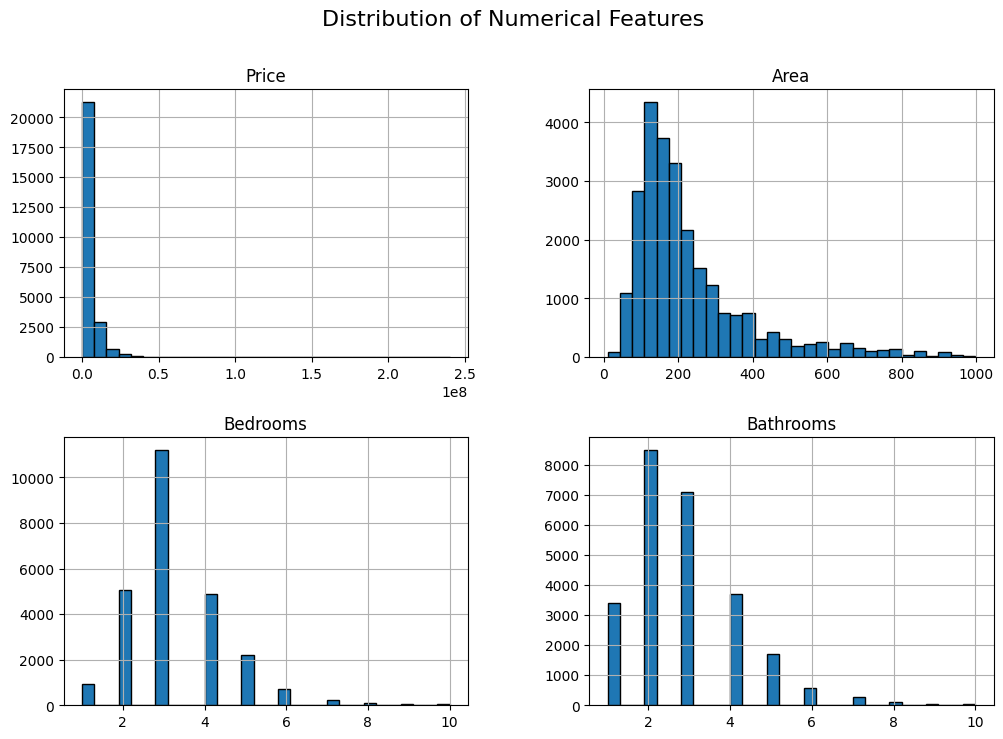

In [29]:
num_cols = ['Price', 'Area', 'Bedrooms', 'Bathrooms']

df[num_cols].hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


**🧩Insights from Numerical Distributions**
- **Price**: Right-skewed — most properties are within a moderate price range, but a few luxury listings are extremely high.
- **Area**: Also right-skewed — most houses fall into average sizes with a few very large properties.
- **Bedrooms/Bathrooms**: Most houses have 2–4 bedrooms and 1–3 bathrooms, indicating typical family units.


**2- Detect Outliers**

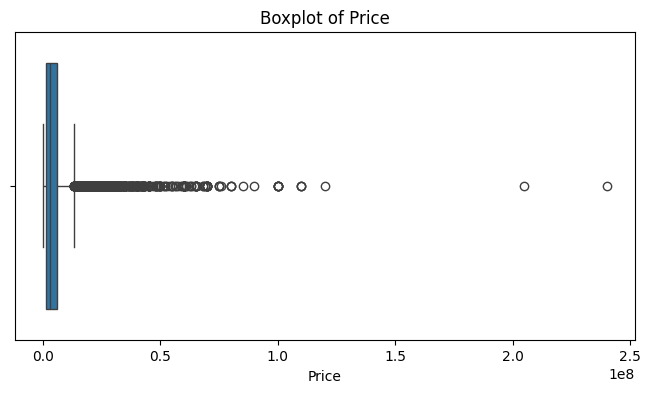

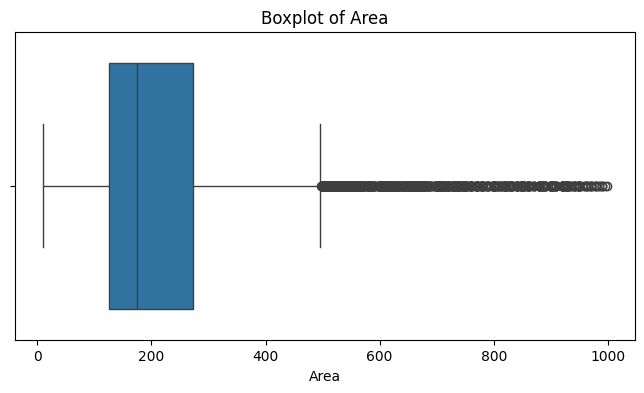

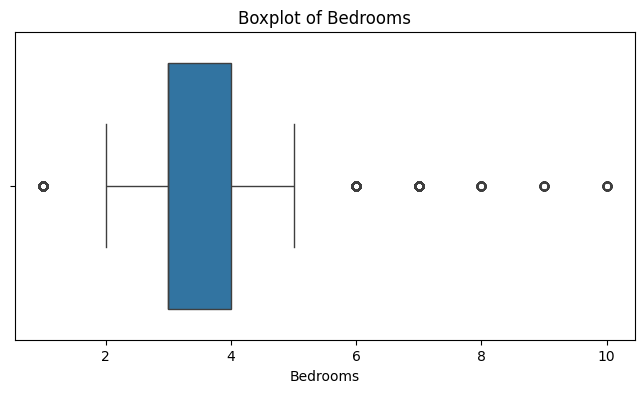

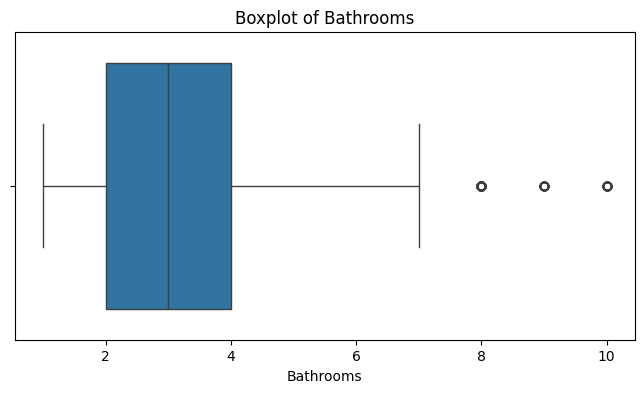

In [30]:
for col in ['Price', 'Area', 'Bedrooms', 'Bathrooms']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


**📦 Outlier Analysis**
- Significant outliers exist in **Price** and **Area** — these represent luxury or large properties.
- Outliers are meaningful in real estate, so they were **not removed** to preserve important information about high-end properties.


**3- Correlation Heatmap**

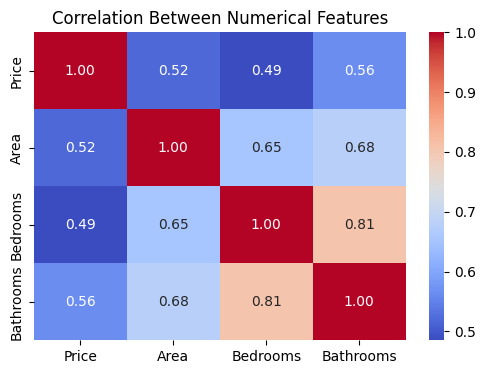

In [31]:
corr = df[['Price', 'Area', 'Bedrooms', 'Bathrooms']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numerical Features")
plt.show()


**🔗 Correlation Insights (Numerical Features)**

- **Bathrooms (0.56)** and **Area (0.52)** show the strongest positive correlation with **Price**.  
- **Bedrooms (0.45)** also correlate positively but less strongly.  
- These results confirm that **property size and amenities** are the main drivers of price.  



**4- Distribution of Categorical Features**

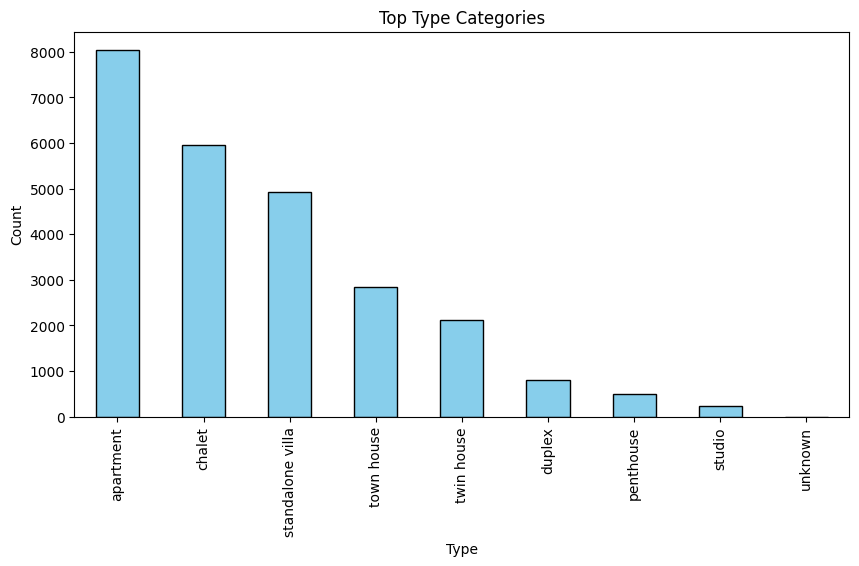

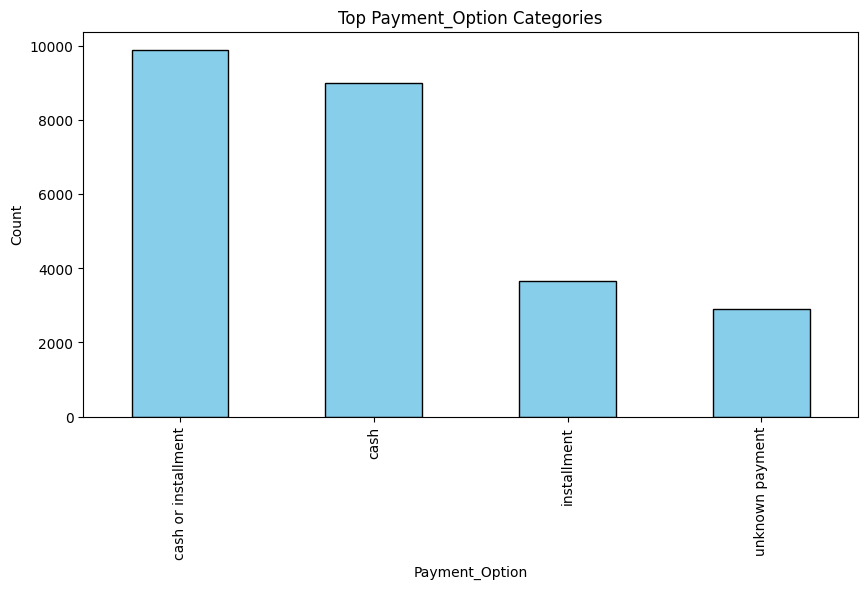

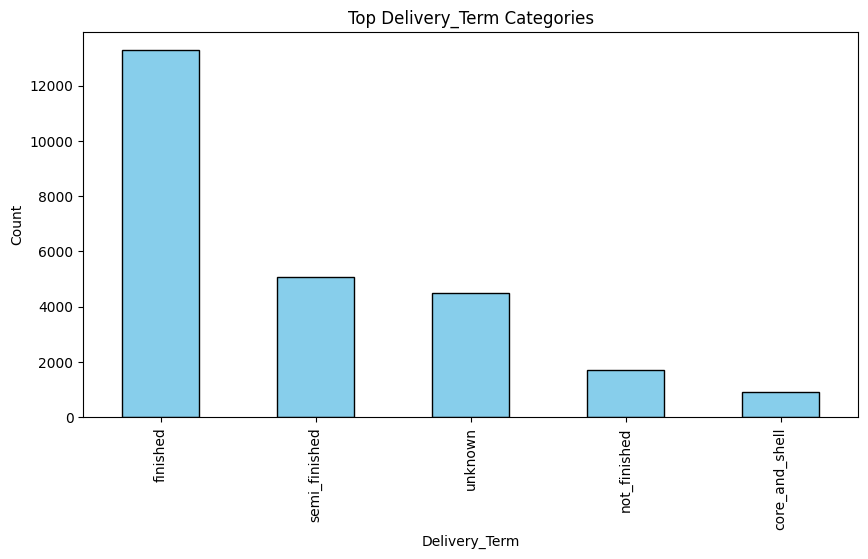

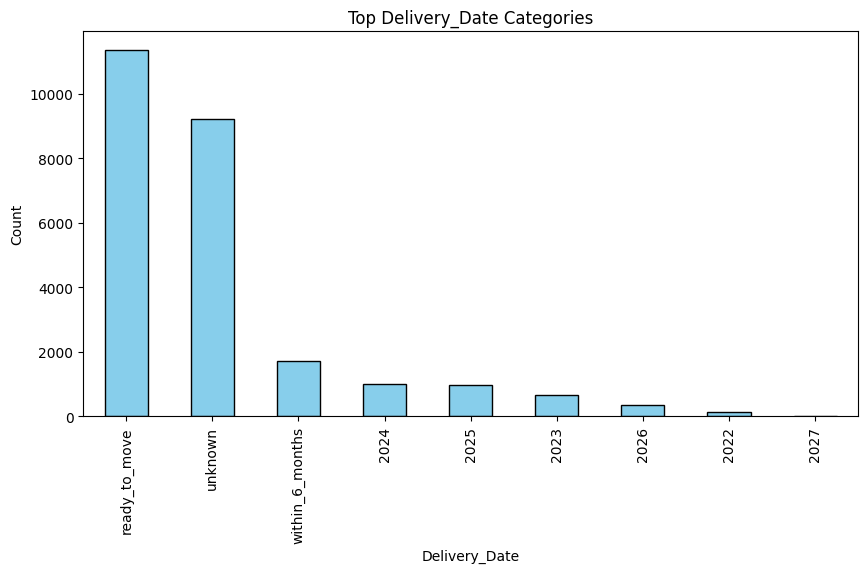

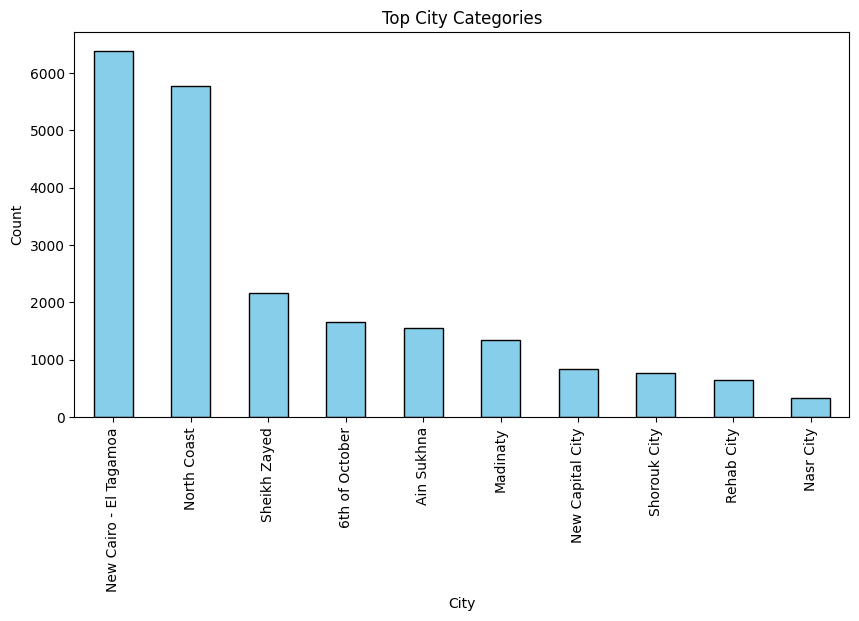

In [32]:
cat_cols = ['Type', 'Payment_Option', 'Delivery_Term', 'Delivery_Date', 'City']

for col in cat_cols:
    plt.figure(figsize=(10, 5))
    df[col].value_counts().head(10).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Top {col} Categories")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


***🏘️ Categorical Feature Insights***
- The most common **property types** are *apartments* and *Chalet*.
- **Payment options** are diverse — indicating flexibility in purchase terms.
- **Delivery terms/dates** suggest many ready-to-move or near-completion projects.
- **Cities** show uneven distribution; New Cairo and North Coast dominate the listings.


**5- Furnished vs Unfurnished**

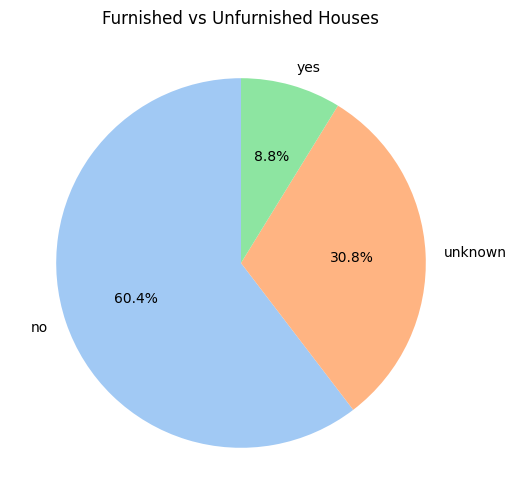

In [33]:
df['Furnished'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6,6),
    colors=sns.color_palette('pastel')
)
plt.title("Furnished vs Unfurnished Houses")
plt.ylabel("")
plt.show()


***🛋️ Furnishing Insights***
- Around 8.8%  of listings are **furnished**.
- Majority of listings are **unfurnished**, possibly indicating properties aimed at long-term owners rather than short-term rentals.


## 📊 Exploratory Data Analysis (EDA) Summary

- **Dataset shape:** 25,433 rows × 12 columns after cleaning and deduplication.  
- **Outliers:** Kept intentionally, as high-value listings reflect real market diversity.  
- **Numerical features:** 
  - Price and Area are right-skewed, with a few luxury outliers.  
  - Most properties have 2–4 bedrooms and 1–3 bathrooms.  
- **Categorical features:** 
  - Apartments and chalets dominate the listings.  
  - New Cairo and North Coast are the most frequent cities.  
  - Most properties are unfurnished and ready to move.  
- **Correlation insights:** 
  - Bathrooms (0.56) and Area (0.52) have the strongest impact on Price.  
  - Bedrooms (0.49) also relate positively but less strongly.  
- **Key takeaway:**  
  - Price depends mainly on **property size, facilities, and location**.  


In [34]:
df.to_csv("cleaned_egypt_houses.csv", index=False)

# 4- Feature Engineering

**1- Creating New Features**

In [35]:
df['price_per_m2'] = df['Price'] / df['Area']
df['total_rooms'] = df['Bedrooms'] + df['Bathrooms']


**2- Handle Skewed Distributions**

In [36]:
df['Log_Price'] = np.log1p(df['Price'])
df['Log_Area'] = np.log1p(df['Area'])


**3- Encode Categorical Features**

In [37]:
label_enc = LabelEncoder()
categorical_cols = ['City', 'Type', 'Furnished', 'Delivery_Term']

for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col].astype(str))


**4- Drop High-cardinality Columns**

In [38]:
df = df.drop(['Compound', 'Developer'], axis=1, errors='ignore')


In [39]:
# ✅ Verify feature structure
df.info()
display(df.head())
display(df.tail())


<class 'pandas.core.frame.DataFrame'>
Index: 25433 entries, 0 to 25433
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Type            25433 non-null  int64   
 1   Price           25433 non-null  float64 
 2   Bedrooms        25433 non-null  float64 
 3   Bathrooms       25433 non-null  float64 
 4   Area            25433 non-null  float64 
 5   Furnished       25433 non-null  int64   
 6   Level           25433 non-null  category
 7   Payment_Option  25433 non-null  category
 8   Delivery_Date   25433 non-null  category
 9   Delivery_Term   25433 non-null  int64   
 10  City            25433 non-null  int64   
 11  price_per_m2    25433 non-null  float64 
 12  total_rooms     25433 non-null  float64 
 13  Log_Price       25433 non-null  float64 
 14  Log_Area        25433 non-null  float64 
dtypes: category(3), float64(8), int64(4)
memory usage: 2.6 MB


,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Date,Delivery_Term,City,price_per_m2,total_rooms,Log_Price,Log_Area
0,2,4000000.0,3.0,3.0,400.0,0,7,cash,ready_to_move,1,117,10000.000000,6.0,15.201805,5.993961
1,0,4000000.0,3.0,3.0,160.0,0,10+,cash,ready_to_move,1,42,25000.000000,6.0,15.201805,5.081404
2,0,2250000.0,3.0,2.0,165.0,0,1,cash,ready_to_move,1,166,13636.363636,5.0,14.626441,5.111988
3,0,1900000.0,3.0,2.0,230.0,0,10,cash,ready_to_move,1,117,8260.869565,5.0,14.457365,5.442418
4,0,5800000.0,2.0,3.0,160.0,0,Ground,cash,ready_to_move,3,119,36250.000000,5.0,15.573369,5.081404


,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Date,Delivery_Term,City,price_per_m2,total_rooms,Log_Price,Log_Area
25429,6,890000.0,3.0,2.0,240.0,1,Unknown,unknown payment,unknown,4,126,3708.333333,5.0,13.698978,5.484797
25430,6,4000000.0,4.0,3.0,218.0,1,Unknown,cash or installment,unknown,1,119,18348.623853,7.0,15.201805,5.389072
25431,7,13800000.0,3.0,4.0,308.0,0,Unknown,cash,ready_to_move,3,119,44805.194805,7.0,16.440179,5.733341
25432,4,35000000.0,4.0,4.0,478.0,1,Unknown,unknown payment,unknown,1,113,73221.757322,8.0,17.370859,6.171701
25433,4,4800000.0,5.0,5.0,175.0,0,Unknown,cash,unknown,1,159,27428.571429,10.0,15.384127,5.170484


🧱**Feature Engineering Summary**

- Created new features:  
  - **`price_per_m2`** → Price divided by Area  
  - **`total_rooms`** → Sum of Bedrooms and Bathrooms  

- Applied **log transformation** on:
  - `Price` → `Log_Price`
  - `Area` → `Log_Area`  
  _(to reduce skewness and improve model performance)_

- **Encoded categorical columns** using `LabelEncoder`:  
  - `City`, `Type`, `Furnished`, `Delivery_Term`

- **Dropped less informative columns**:  
  - `Compound`, `Developer`

- ✅ The dataset now contains **15 clean and transformed features**, ready for model building.


# 5- Machine learning Models

**1- Define Features and Target**

In [40]:
X = df.drop('Price', axis=1)
y = df['Price']

print("✅ Features shape:", X.shape)
print("✅ Target shape:", y.shape)


✅ Features shape: (25433, 14)
✅ Target shape: (25433,)


**2- Split Data into Train and Test Sets**

In [41]:
# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ X_train:", X_train.shape)
print("✅ X_test:", X_test.shape)


✅ X_train: (20346, 14)
✅ X_test: (5087, 14)


**3- Encode Categorical Columns**

In [42]:
# Detect categorical columns
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
print("📋 Categorical columns:", cat_cols)

# Initialize encoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) 

# Copy data before encoding
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

# Fit and transform categorical features
if len(cat_cols) > 0:
    encoder.fit(X_train[cat_cols])
    X_train_enc[cat_cols] = encoder.transform(X_train[cat_cols])
    X_test_enc[cat_cols] = encoder.transform(X_test[cat_cols])

# Fill missing values
X_train_enc = X_train_enc.fillna(-999)
X_test_enc = X_test_enc.fillna(-999)


📋 Categorical columns: ['Level', 'Payment_Option', 'Delivery_Date']


**4- Train Multiple Regression Models**

In [48]:
models = {
    "Linear Regression": LinearRegression(),  # Baseline model, no hyperparameters
    "Ridge Regression": Ridge(
        alpha=5.0,          # Increase alpha for more regularization to reduce overfitting
        solver='auto',      # Default solver handles small/medium datasets efficiently
        random_state=42
    ),
    "Random Forest": RandomForestRegressor(
        n_estimators=300,   # More trees improve stability and accuracy
        max_depth=12,       # Limit depth to prevent overfitting
        min_samples_split=5, # Minimum samples to split a node
        min_samples_leaf=2, # Minimum samples per leaf
        max_features='sqrt',# Reduce number of features per split for decorrelation
        n_jobs=-1,          # Use all cores for faster training
        random_state=42
    ),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=500,   # More boosting rounds
        learning_rate=0.05, # Smaller learning rate for smoother convergence
        max_depth=4,        # Limit tree depth to prevent overfitting
        min_samples_split=5,
        min_samples_leaf=3,
        subsample=0.8,      # Randomly sample 80% of data for each tree (reduces overfitting)
        max_features='sqrt',
        random_state=42
    )
}

# -----------------------------
# Train all models
# -----------------------------
for name, model in models.items():
    model.fit(X_train_enc, y_train)
    print(f"✅ {name} trained successfully!")


✅ Linear Regression trained successfully!
✅ Ridge Regression trained successfully!
✅ Random Forest trained successfully!
✅ Gradient Boosting trained successfully!


**5- Evaluate Model Performance**

In [50]:
results = []

for name, model in models.items():
    # Predictions
    y_train_pred = model.predict(X_train_enc)
    y_test_pred = model.predict(X_test_enc)

    # Metrics
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Fit status
    if r2_train - r2_test > 0.1:
        fit_status = "Overfitting"
    elif r2_train < 0.5 and r2_test < 0.5:
        fit_status = "Underfitting"
    else:
        fit_status = "Good Fit"

    # Store results
    results.append({
        'Model': name,
        'R2 Train': r2_train,
        'R2 Test': r2_test,
        'RMSE Train': rmse_train,
        'RMSE Test': rmse_test,
        'MAE Train': mae_train,
        'MAE Test': mae_test,
        'Fit Status': fit_status
    })

# Convert to DataFrame
results_df = pd.DataFrame(results).set_index('Model')

# Sort by R2 Test
results_df = results_df.sort_values(by='R2 Test', ascending=False)

display(results_df)


,R2 Train,R2 Test,RMSE Train,RMSE Test,MAE Train,MAE Test,Fit Status
Model,,,,,,,
Gradient Boosting,0.998406,0.997368,2.843308e+05,3.062244e+05,1.544062e+05,1.608730e+05,Good Fit
Random Forest,0.977227,0.995250,1.074814e+06,4.113432e+05,1.468321e+05,1.496488e+05,Good Fit
Ridge Regression,0.745110,0.837500,3.595865e+06,2.406006e+06,1.604784e+06,1.498665e+06,Good Fit
Linear Regression,0.745110,0.837483,3.595864e+06,2.406135e+06,1.604897e+06,1.498759e+06,Good Fit


**6- Save the Best Model**

In [45]:
import joblib

# Get best model
best_model_name = results_df.index[0] # model name with highest R2
best_model = models[best_model_name]

# Save as pickle file
joblib.dump(best_model, f"{best_model_name.replace(' ', '_').lower()}_model.pkl")
print(f"💾 Best model ({best_model_name}) saved successfully!")


💾 Best model (Gradient Boosting) saved successfully!


**🧠 Machine Learning Summary**

After preparing the data, four regression models were trained and evaluated to predict house prices:

| Model | R² Train | R² Test | RMSE Train | RMSE Test | MAE Train | MAE Test | Fit Status |
|:--|--:|--:|--:|--:|--:|--:|--:|
| **Gradient Boosting** | 0.9984 | 0.9974 | 284,330.80 | 306,224.40 | 154,406.20 | 160,873.00 | Good Fit |
| **Random Forest** | 0.9772 | 0.9953 | 1,074,814.00 | 411,343.20 | 146,832.10 | 149,648.80 | Good Fit |
| **Ridge Regression** | 0.7451 | 0.8375 | 3,595,865.00 | 2,406,006.00 | 1,604,784.00 | 1,498,665.00 | Good Fit |
| **Linear Regression** | 0.7451 | 0.8375 | 3,595,864.00 | 2,406,135.00 | 1,604,897.00 | 1,498,759.00 | Good Fit |

---

### 🔍 Insights:
- **Ensemble models** (Gradient Boosting and Random Forest) performed far better than linear models, achieving near-perfect predictive accuracy.  
- **Gradient Boosting** slightly outperformed **Random Forest**, showing the lowest RMSE and MAE, indicating it captures complex relationships effectively.  
- **Linear and Ridge Regression** showed decent performance but couldn’t handle the nonlinear patterns in the data as effectively.

---

### 🏆 Best Model:
The **Gradient Boosting Regressor** achieved the **highest accuracy (R² ≈ 1.0)** and **lowest error metrics**, making it the most reliable model for predicting property prices in this dataset.

---

### 💾 Model Deployment:
The Gradient Boosting model was saved as a `.pkl` file for future deployment or integration into applications.


In [46]:
df.to_csv("egypt_houses_after_modeling.csv", index=False) # saving the data after all transformations

# 🏠 Egypt House Prices Prediction Project

## 📘 Project Overview
This project aims to predict **house prices in Egypt** using machine learning models.  
We went through the full data science workflow — from **data cleaning and preprocessing**, through **EDA**, **feature engineering**, and finally **model training and evaluation**.

---

## 🧹 1. Data Cleaning
- Removed duplicates and irrelevant columns (`Compound`, `Developer`).
- Handled missing values by keeping them as `NaN` for later interpretation.
- Normalized text columns and standardized formats.
- Converted categorical columns (`Level`, `City`) to appropriate data types.
- Final dataset shape: **(25,433 rows × 12 columns)**  
- Memory usage optimized: **~9.5 MB**

---

## 📊 2. Exploratory Data Analysis (EDA)
- **Price, Area, Bedrooms, Bathrooms** → right-skewed distributions.
- **Most listings** are **unfurnished**, targeting long-term buyers.
- **New Cairo and North Coast** dominate in number of listings.
- **Correlation Analysis:**
  - Strongest correlation with `Price`:  
    - `Bathrooms` (0.56)  
    - `Area` (0.52)

---

## 🧩 3. Feature Engineering
- Added new features:
  - `price_per_m2` = Price / Area  
  - `total_rooms` = Bedrooms + Bathrooms  
  - `Log_Price` and `Log_Area` for better scaling.
- Encoded categorical variables with `LabelEncoder`.
- Dropped high-cardinality or uninformative columns.

---

## 🤖 4. Machine Learning Modeling
**Models trained:**
- Linear Regression  
- Ridge Regression  
- Random Forest Regressor  
- Gradient Boosting Regressor  

**Performance Summary:**

After preparing the data, four regression models were trained and evaluated to predict house prices:

| Model | R² Train | R² Test | RMSE Train | RMSE Test | MAE Train | MAE Test | Fit Status |
|:--|--:|--:|--:|--:|--:|--:|--:|
| **Gradient Boosting** | 0.9984 | 0.9974 | 284,330.80 | 306,224.40 | 154,406.20 | 160,873.00 | Good Fit |
| **Random Forest** | 0.9772 | 0.9953 | 1,074,814.00 | 411,343.20 | 146,832.10 | 149,648.80 | Good Fit |
| **Ridge Regression** | 0.7451 | 0.8375 | 3,595,865.00 | 2,406,006.00 | 1,604,784.00 | 1,498,665.00 | Good Fit |
| **Linear Regression** | 0.7451 | 0.8375 | 3,595,864.00 | 2,406,135.00 | 1,604,897.00 | 1,498,759.00 | Good Fit |


✅ **Best Model:** Gradient Boosting Regressor — achieved excellent performance with near-perfect R² and minimal errors.

---

## 🏁 Final Notes
- The dataset was well-prepared and clean, leading to strong model accuracy.
- The model can effectively predict house prices based on area, number of rooms, and location.
- Future improvements could include:
  - Adding more external data (e.g., neighborhood quality, developer reputation)
  - Performing hyperparameter tuning for Gradient Boosting
  - Visual model evaluation and deployment as a web app or API
---

**Project Complete ✅**
